In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("data/movies.csv")
df2 = pd.read_csv("data/links.csv")
df3 = pd.read_csv("data/ratings.csv")
df4 = pd.read_csv("data/tags.csv")

df = df1.merge(df2, on="movieId").merge(df3, on="movieId").merge(df4, on="movieId", how="left")
df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,567.0,fun,1.525286e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,336.0,pixar,1.139046e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,474.0,pixar,1.137207e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285762 entries, 0 to 285761
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285762 non-null  int64  
 1   title        285762 non-null  object 
 2   genres       285762 non-null  object 
 3   imdbId       285762 non-null  int64  
 4   tmdbId       285749 non-null  float64
 5   userId_x     285762 non-null  int64  
 6   rating       285762 non-null  float64
 7   timestamp_x  285762 non-null  int64  
 8   userId_y     233213 non-null  float64
 9   tag          233213 non-null  object 
 10  timestamp_y  233213 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 24.0+ MB


In [4]:
df.describe()

,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,timestamp_y
count,285762.000000,2.857620e+05,285749.000000,285762.000000,285762.000000,2.857620e+05,233213.000000,2.332130e+05
mean,14927.386405,2.956129e+05,12796.621650,313.894279,3.841270,1.214707e+09,470.683564,1.384774e+09
std,31403.373103,5.150267e+05,43480.582756,179.451387,1.020798,2.233730e+08,153.329632,1.534621e+08
min,1.000000,4.170000e+02,2.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,1.098300e+05,489.000000,160.000000,3.000000,1.019133e+09,424.000000,1.242494e+09
50%,1721.000000,1.125730e+05,680.000000,314.000000,4.000000,1.211377e+09,477.000000,1.457901e+09
75%,5673.000000,2.415270e+05,8963.000000,465.000000,4.500000,1.445346e+09,599.000000,1.498457e+09
max,193609.000000,8.391976e+06,525662.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


In [ ]:
# películas con rating de 5
df_rating5 = df[df['rating'] == 5]
ranking = df_rating5.groupby(['movieId', 'title']).size().reset_index(name='count')
ranking = ranking.sort_values('count', ascending=False)
ranking.head(10)

,movieId,title,count
161,296,Pulp Fiction (1994),22263
1173,2959,Fight Club (1999),4374
140,260,Star Wars: Episode IV - A New Hope (1977),2704
409,924,2001: A Space Odyssey (1968),1394
160,293,Léon: The Professional (a.k.a. The Professiona...,1225
1954,7361,Eternal Sunshine of the Spotless Mind (2004),1122
2457,79132,Inception (2010),1066
198,356,Forrest Gump (1994),1044
761,1732,"Big Lebowski, The (1998)",1024
66,110,Braveheart (1995),800


In [ ]:
# peliculas con mas ratings
popular_movies = df.groupby(['movieId', 'title']).size().reset_index(name='num_ratings')
popular_movies = popular_movies.sort_values('num_ratings', ascending=False)
popular_movies.head(10)

,movieId,title,num_ratings
257,296,Pulp Fiction (1994),55567
2224,2959,Fight Club (1999),11772
224,260,Star Wars: Episode IV - A New Hope (1977),6526
254,293,Léon: The Professional (a.k.a. The Professiona...,4655
706,924,2001: A Space Odyssey (1968),4469
4900,7361,Eternal Sunshine of the Spotless Mind (2004),4454
7355,79132,Inception (2010),3718
1297,1732,"Big Lebowski, The (1998)",3392
3557,4878,Donnie Darko (2001),3161
314,356,Forrest Gump (1994),2961


In [ ]:
· promedio de rating por pelicula
avg_rating = df.groupby(['movieId', 'title'])['rating'].mean().reset_index(name='avg_rating')
avg_rating = avg_rating.sort_values('avg_rating', ascending=False)
avg_rating.head(10)

,movieId,title,avg_rating
9693,187717,Won't You Be My Neighbor? (2018),5.0
4667,6983,Jane Eyre (1944),5.0
3802,5328,Rain (2001),5.0
7927,95843,Goodbye Charlie (1964),5.0
2934,3941,Sorority House Massacre (1986),5.0
2933,3940,Slumber Party Massacre III (1990),5.0
2932,3939,Slumber Party Massacre II (1987),5.0
5015,7815,True Stories (1986),5.0
9349,162414,Moonlight,5.0
9347,162344,Tom Segura: Mostly Stories (2016),5.0


In [8]:
# tags mas usados
common_tags = df['tag'].value_counts().head(10)
print(common_tags)

tag
sci-fi               2527
thought-provoking    2487
twist ending         2434
atmospheric          2227
dark comedy          2056
superhero            1787
psychology           1750
Disney               1748
time travel          1730
suspense             1716
Name: count, dtype: int64


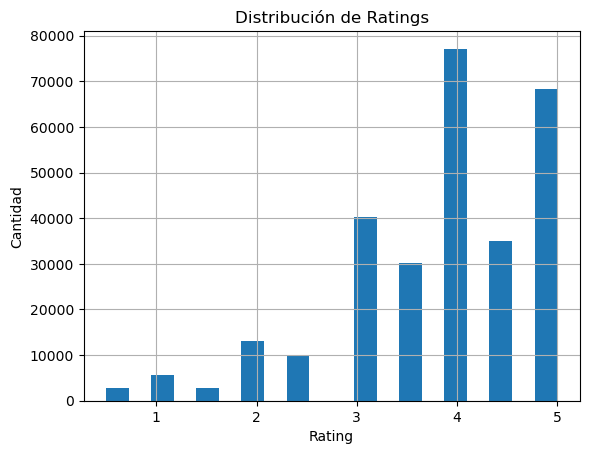

In [ ]:
# distribucion de ratings
df['rating'].hist(bins=20)
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Distribución de Ratings')
plt.show()